# Opencv Basics


In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import imutils
import argparse
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

---


In [2]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

## 1 - Loading and Displaying Images

[Reference](https://pyimagesearch.com/2021/01/20/opencv-load-image-cv2-imread/?_ga=2.114802688.608670271.1656952021-258974203.1656952021)

- For loading any images, you need to bring those images into the memory first.
- Anytime you see these None or NoneType errors, your first step in diagnosing and resolving them is to investigate whether your image was successfully read from disk correctly. 99% of the time the error is due to your code assuming a valid image, but in fact the image was not properly read from disk!

In [3]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#    help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
    "image": "neeraj.jpg",
}

In [4]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 800 pixels
height: 800  pixels
channels: 3


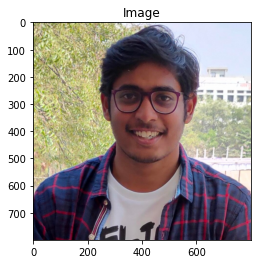

True

In [5]:
# show the image and wait for a keypress
plt_imshow("Image", image)

# save the image back to disk (OpenCV handles converting image
# filetypes automatically)
cv2.imwrite("newimage.jpg", image)

## 2 -  Opencv Getting and setting pixels

[Reference](https://pyimagesearch.com/2021/01/20/opencv-getting-and-setting-pixels/)

- Pixels are the raw building blocks of an image.
- A pixel is considered the “color” or the “intensity” of light that appears in a given place in our image.
- In a grayscale image, each pixel has a value between 0 and 255, where 0 corresponds to “black” and 255 being “white.”
- Images are simply NumPy arrays, with the origin (0, 0) located at the top-left of the image.
- Images are generally expressed in RGB Order, back when OpenCV was originally developed, BGR ordering was the standard! It was only later that the RGB order was adopted. 
- Image[y, x] is what trips up many students. Take a second to convince yourself that image[y, x] is the correct syntax based on the fact that the x-value is your column number (i.e., width), and the y-value is your row number (i.e., height).
- Image = (height, width, no of color channels)

In [6]:
args = {
    "image": "neeraj.jpg"
}

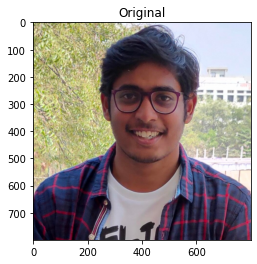

In [7]:
# load the image, grab its spatial dimensions (width and height),
# and then display the original image to our screen
image = cv2.imread(args["image"])
(h, w) = image.shape[:2]
plt_imshow("Original", image)

In [8]:

(b, g, r) = image[0, 0]
print("Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# access the pixel located at x=50, y=20
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

# update the pixel at (50, 20) and set it to red
image[20, 50] = (0, 0, 255)
(b, g, r) = image[20, 50]
print("Pixel at (50, 20) - Red: {}, Green: {}, Blue: {}".format(r, g, b))

Pixel at (0, 0) - Red: 138, Green: 138, Blue: 84
Pixel at (50, 20) - Red: 175, Green: 175, Blue: 111
Pixel at (50, 20) - Red: 255, Green: 0, Blue: 0


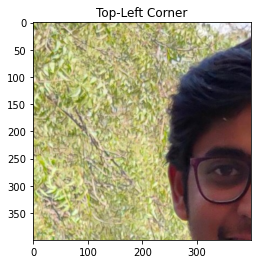

In [9]:
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

# since we are using NumPy arrays, we can apply array slicing to grab
# large chunks/regions of interest from the image -- here we grab the
# top-left corner of the image
tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

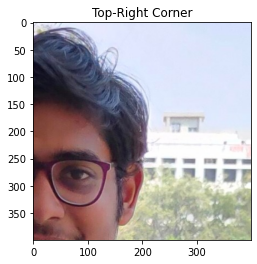

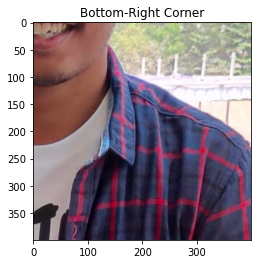

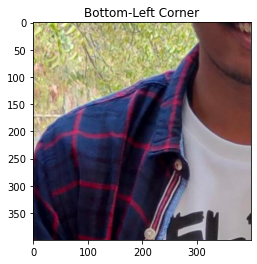

In [10]:
# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

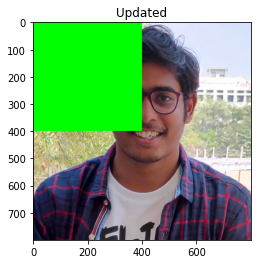

In [11]:
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image)

## 3 -  Drawing with OpenCV

[Reference](https://pyimagesearch.com/2021/01/27/drawing-with-opencv/) 
- cv2.line: Draws a line on image, starting at a specified (x, y)-coordinate and ending at another (x, y)-coordinate
    - The first argument to this method is the image upon which we are going to draw. 
    - The second argument is the starting point of the line. 
    - We also need to supply an ending point for the line (the third argument).
    - The Fourth argument is the color of our line.
    - The last argument is the thickness(optional)
- cv2.circle: Draws a circle on an image specified by the center (x, y)-coordinate and a supplied radius
   - cv2.circle(canvas, (centerX, centerY), r, bgr_list)
- cv2.rectangle: Draws a rectangle on an image specified by the top-left corner and bottom-right corner (x, y)-coordinates
    - Arguments same as line, for thickness if you want the shape to be filled then: We just pass a negative value for the thickness argument.
- cv2.ellipse: Draws an ellipse on an image
- cv2.polylines: Draws the outline of a polygon specified by a set of (x, y)-coordinates
- cv2.fillPoly: Draws a polygon, but instead of drawing the outline, instead fills in the polygon
- cv2.arrowedLine: Draws an arrow pointing from a starting (x, y)-coordinate to an ending (x, y)-coordinate

In [12]:
# initialize our canvas as a 300x300 pixel image with 3 channels
# (Red, Green, and Blue) with a black background
canvas = np.zeros((300, 300, 3), dtype="uint8")

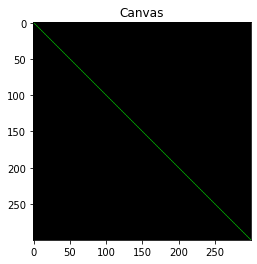

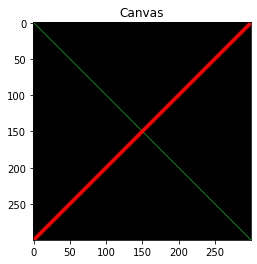

In [13]:
# draw a green line from the top-left corner of our canvas to the
# bottom-right
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt_imshow("Canvas", canvas)

# draw a 3 pixel thick red line from the top-right corner to the
# bottom-left
red = (0, 0, 255)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt_imshow("Canvas", canvas)

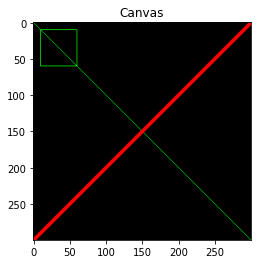

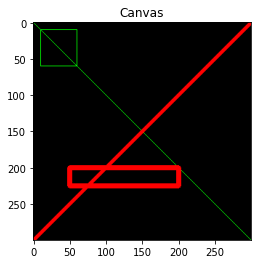

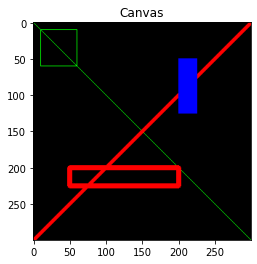

In [14]:
# draw a green 50x50 pixel square, starting at 10x10 and ending at 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)
plt_imshow("Canvas", canvas)

# draw another rectangle, this one red with 5 pixel thickness
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt_imshow("Canvas", canvas)

# draw a final rectangle (blue and filled in )
blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt_imshow("Canvas", canvas)

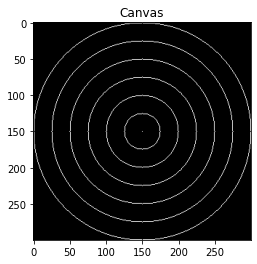

In [15]:
# re-initialize our canvas as an empty array, then compute the
# center (x, y)-coordinates of the canvas
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

# loop over increasing radii, from 25 pixels to 150 pixels in 25
# pixel increments
for r in range(0, 175, 25):
    # draw a white circle with the current radius size
    cv2.circle(canvas, (centerX, centerY), r, white)

# show our work of art
plt_imshow("Canvas", canvas)

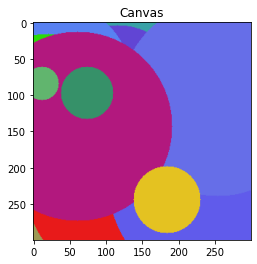

In [16]:
# re-initialize our canvas once again
canvas = np.zeros((300, 300, 3), dtype="uint8")

# let's draw 25 random circles
for i in range(0, 25):
    # randomly generate a radius size between 5 and 200, generate a
    # random color, and then pick a random point on our canvas where
    # the circle will be drawn
    radius = np.random.randint(5, high=200)
    color = np.random.randint(0, high=256, size=(3,)).tolist()
    pt = np.random.randint(0, high=300, size=(2,))

    # draw our random circle on the canvas
    cv2.circle(canvas, tuple(pt), radius, color, -1)

# display our masterpiece to our  screen
plt_imshow("Canvas", canvas)

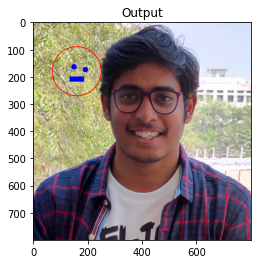

In [17]:
# load the input image from disk
image = cv2.imread(args["image"])

# draw a circle around my face, two filled in circles covering my
# eyes, and a rectangle over top of my mouth
cv2.circle(image, (160, 180), 90, (0, 0, 255), 2)
cv2.circle(image, (150, 164), 10, (255, 0, 0), -1)
cv2.circle(image, (192, 174), 10, (255, 0, 0), -1)
cv2.rectangle(image, (134, 200), (186, 218), (255, 0, 0), -1)

# show the output image
plt_imshow("Output", image)

##  4 -  Image Translation


[Reference](https://pyimagesearch.com/2021/02/03/opencv-image-translation)

- Translating an image is given by Numpy Matrix in the form 
       [
          [1, 0, shiftX],
          [0, 1, shiftY]
       ]
- If the value of shiftX is positive, then we are shifting right side, if negative then its towards left side.
- If the value of shiftY is positive, then we are shifting down side, if negative then its towards upside.

In [18]:
args = {
    "image": "opencv_logo.png"
}

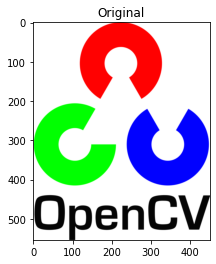

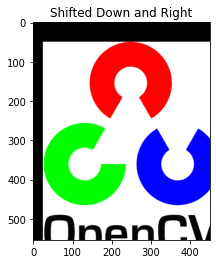

In [19]:
# load the image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# shift the image 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Down and Right", shifted)

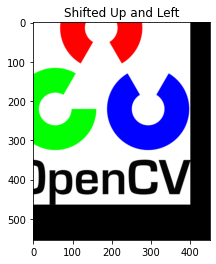

In [20]:
# now, let's shift the image 50 pixels to the left and 90 pixels
# up by specifying negative values for the x and y directions,
# respectively
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Up and Left", shifted)

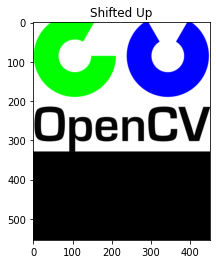

In [21]:
# use the imutils helper function to translate the image 100 pixels
# down in a single function call
shifted = imutils.translate(image, 0, -image.shape[1]//2)
plt_imshow("Shifted Up", shifted)

##  5 -  Rotation


[Reference](https://pyimagesearch.com/2021/01/20/opencv-rotate-image)

- [center_coordinate, angle, scale] 
     - Remember that in OpenCV, positive degrees specify counterclockwise rotation while negative degrees indicate clockwise rotation
     - OpenCV does not automatically allocate space for our entire rotated image to fit into the frame.
- imutils.rotate_bound function:
    - This function will automatically expand the image array such that the entire rotated image fits within it.
    - The imutils.rotate_bound function inverts the relationship between positive/negative values and clockwise/counterclockwise rotation. Here, negative values will rotate counterclockwise while positive values will rotate clockwise.

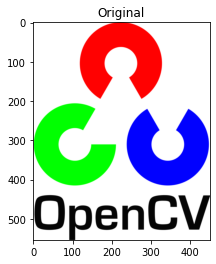

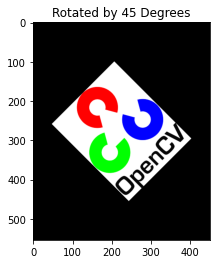

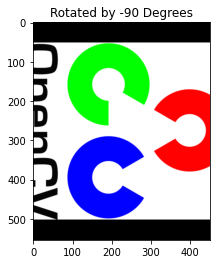

In [22]:
# load the image and show it
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# grab the dimensions of the image and calculate the center of the
# image
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 0.5)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by 45 Degrees", rotated)

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by -90 Degrees", rotated)

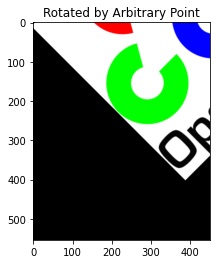

In [23]:
# rotate our image around an arbitrary point rather than the center
M = cv2.getRotationMatrix2D((10, 10), 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
plt_imshow("Rotated by Arbitrary Point", rotated)

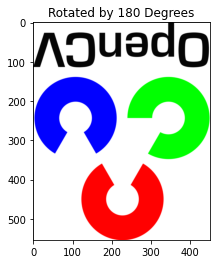

In [24]:
# use our imutils function to rotate an image 180 degrees
rotated = imutils.rotate(image, 180)
plt_imshow("Rotated by 180 Degrees", rotated)

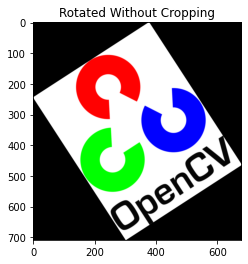

In [25]:
# rotate our image by 33 degrees counterclockwise, ensuring the
# entire rotated image still views in the viewing area
rotated = imutils.rotate_bound(image, -33)
plt_imshow("Rotated Without Cropping", rotated)

##  6 -  Resizing


[Reference](https://pyimagesearch.com/2021/01/20/opencv-resize-image-cv2-resize)

- Maintaining the Aspect ratio(width/height) is very important, or else image will be destroyed.
- Interpolation : 
     - A method of constructing new data points within the range of a discrete set of known data points.
     - In our use case, the “known points” are the pixels of our original image. And the goal of an interpolation function is to take these neighborhoods of pixels and use them to either increase or decrease the size of the image.
- Keep in mind that while high-resolution images are visually appealing to the human eyes, they harm computer vision and image processing pipelines:
    - By definition, the larger the image, the more the data, and therefore the longer it takes for algorithms to process the data.
    - High-resolution images are highly detailed — but from a computer vision/image processing perspective, we’re more interested in the structural components of the images, not so much the super fine-grained details
    - Large resolution images are almost always downsampled to help image processing systems run faster and be more accurate
- imutils.resize function, which automatically handles computing and maintaining aspect ratios for us
-  Some common interpolation methods:
     - nearest-neighbor interpolation, specified by the cv2.INTER_NEAREST 
          - This method is fast and simple, the resized image’s quality tends to be relatively poor and can lead to “blocky” artifacts. 
     - cv2.INTER_LINEAR method, which performs bilinear interpolation — this is the method that OpenCV uses by default when resizing images. 
     - cv2.INTER_AREA interpolation method.
     - cv2.INTER_CUBIC and cv2.INTER_LANCZOS4.
          - These methods are slower (since they no longer use simple linear interpolation and instead use splines) and utilize bicubic interpolation over square pixel neighborhoods.
          - The cv2.INTER_CUBIC method operates on a 4 x 4 pixel neighbor and cv2.INTER_LANCZOS4 over an 8 x 8 pixel neighborhood. 
     - When to Use which ?
          - cv2.INTER_NEAREST is quite fast but does not provide the highest quality results. So in very resource-constrained environments, consider using nearest-neighbor interpolation. Otherwise, you probably won’t use this interpolation method much (especially if you try to increase the image size).
          - When increasing (upsampling) the size of an image, consider using cv2.INTER_LINEAR and cv2.INTER_CUBIC. The cv2.INTER_LINEAR method tends to be slightly faster than the cv2.INTER_CUBIC method, but go with whichever method provides the best results for your images.
          - When decreasing (downsampling) the size of an image, the OpenCV documentation suggests using cv2.INTER_AREA. Again, you could also use cv2.INTER_NEAREST for downsampling as well, but cv2.INTER_AREA typically yields more aesthetically pleasing results.
          - The cv2.INTER_LINEAR interpolation method is recommended as the default for whenever you’re upsampling or downsampling it merely provides the highest quality results at a modest computation cost.


In [26]:
args = {
    "image": "neeraj.jpg"
}

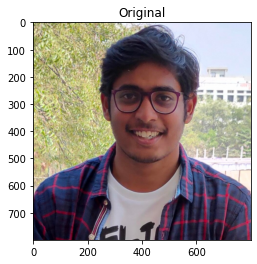

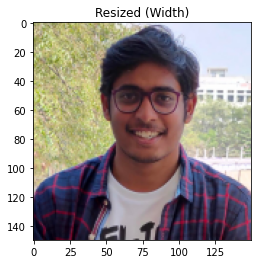

In [27]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

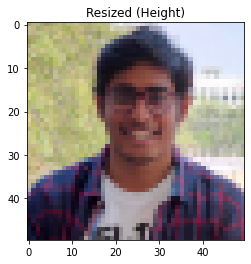

In [28]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

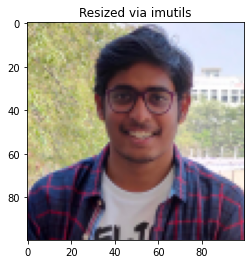

In [29]:
# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us
resized = imutils.resize(image, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


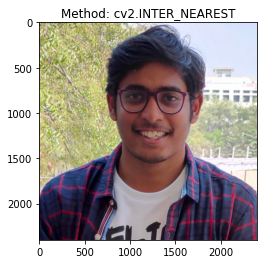

[INFO] cv2.INTER_LINEAR


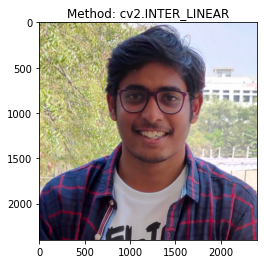

[INFO] cv2.INTER_AREA


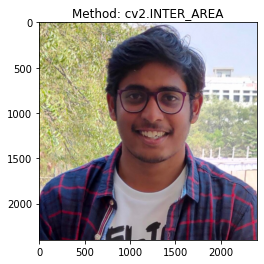

[INFO] cv2.INTER_CUBIC


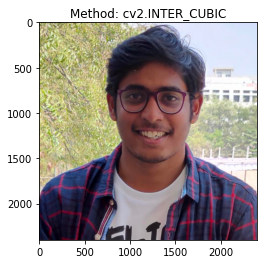

[INFO] cv2.INTER_LANCZOS4


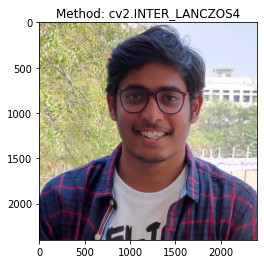

In [30]:
# construct the list of interpolation methods in OpenCV
methods = [
    ("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
    ("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
    ("cv2.INTER_AREA", cv2.INTER_AREA),
    ("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
    ("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
    # increase the size of the image by 3x using the current
    # interpolation method
    print("[INFO] {}".format(name))
    resized = imutils.resize(image, width=image.shape[1] * 3,
        inter=method)
    plt_imshow("Method: {}".format(name), resized)

##  7 -  Flipping


[Reference](https://pyimagesearch.com/2021/01/20/opencv-flip-image-cv2-flip/?_ga=2.151068862.608670271.1656952021-258974203.1656952021)

- Powerful, data-hungry, deep learning algorithms purposely use flipping to generate extra data during training time (through a technique called data augmentation).
- Using a flip code value of 1 indicates that we flipped the image horizontally, around the y-axis.
- A flip code of 0 indicates that we want to flip the image vertically, around the x-axis.
- Using a negative flip code flips the image around both axes.

In [31]:
args = {
    "image": "opencv_logo.png"
}

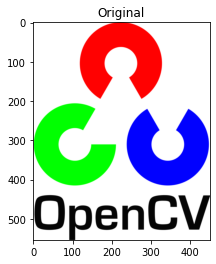

[INFO] flipping image horizontally...


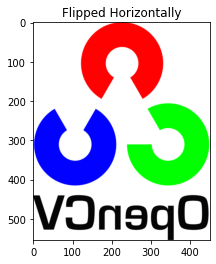

In [32]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

[INFO] flipping image vertically...


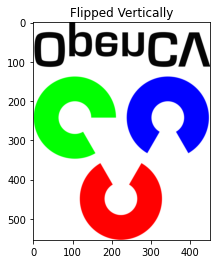

In [33]:
# flip the image vertically
flipped = cv2.flip(image, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

[INFO] flipping image horizontally and vertically...


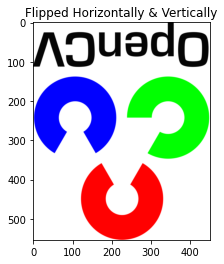

In [34]:
# flip the image along both axes
flipped = cv2.flip(image, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

##  8 -  Croping


[Reference](https://pyimagesearch.com/2021/01/19/crop-image-with-opencv/?_ga=2.176090917.608670271.1656952021-258974203.1656952021)

- Cropping an image with OpenCV is accomplished via simple NumPy array slices in startY:endY, startX:endX order
    - roi = image[startY:endY, startX:endX]
    - The startY:endY slice provides our rows (since the y-axis is our number of rows) while startX:endX provides our columns (since the x-axis is the number of columns) in the image. 

In [35]:
args = {
    "image": "neeraj.jpg"
}

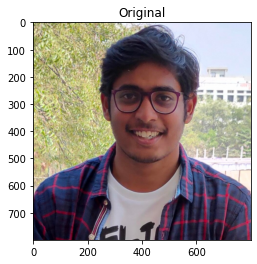

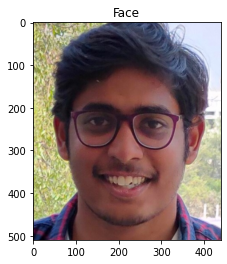

In [36]:
# load the input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)


face = image[40:550, 200:640]
plt_imshow("Face", face)

##  9 -  Image Arithmetic


[Reference](https://pyimagesearch.com/2021/01/19/image-arithmetic-opencv/)

- RGB images as 8-bit unsigned integers who can only take on values in the range [0, 255]
- Images are NumPy arrays stored as unsigned 8-bit integers (unit8) with values in the range [0, 255]; when using the add/subtract functions in OpenCV, these values will be *clipped* to this range, even if they fall outside the range [0, 255] after applying the operation.
- In short, the conclusion of above is "NumPy will perform modulus arithmetic and “wrap around.” On the other hand, OpenCV will perform clipping and ensure pixel values never fall outside the range [0, 255]."
- Some applications:
   - Adjusting brightness and contrast by adding or subtracting a set amount (for example, adding 50 to all pixel values to increase the brightness of an image).
   - Working with alpha blending and transparency.
   - Creating Instagram-like filters — these filters are simply mathematical functions applied to the pixel intensities.

In [37]:
args = {
    "image": "grand_canyon.png"
}

In [38]:
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [39]:
# using NumPy arithmetic operations (rather than OpenCV operations)
# will result in a modulo ("wrap around") instead of being clipped
# to the range [0, 255]
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


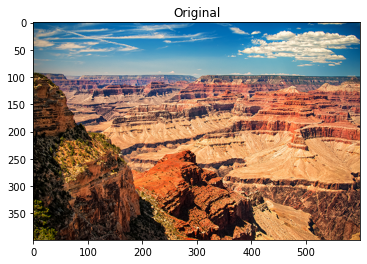

In [40]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

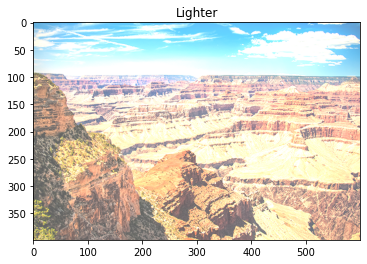

In [41]:
# increasing the pixel intensities in our input image by 100 is
# accomplished by constructing a NumPy array that has the *same
# dimensions* as our input image, filling it with ones, multiplying
# it by 100, and then adding the input image and matrix together
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

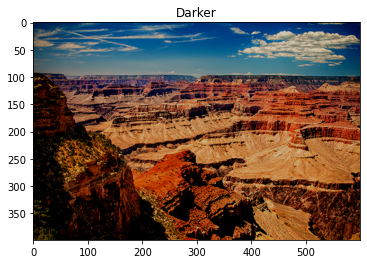

In [42]:
# similarly, we can subtract 50 from all pixels in our image and make it
# darker
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)

##  10 -  Bitwise Operations


[Reference](https://pyimagesearch.com/2021/01/19/opencv-bitwise-and-or-xor-and-not/?_ga=2.105456516.608670271.1656952021-258974203.1656952021)

- Bitwise operations function in a binary manner and are represented as grayscale images. A given pixel is turned “off” if it has a value of zero, and it is turned “on” if the pixel has a value greater than zero.
- The input images that have only two pixel intensity values — either the pixel is 0 (black) or the pixel is greater than zero (white). We call images that only have two pixel intensity values binary images.
- Small review of the bitwise operators that we are using in this section:
    - AND: A bitwise AND is true if and only if both pixels are greater than zero.
    - OR: A bitwise OR is true if either of the two pixels is greater than zero.
    - XOR: A bitwise XOR is true if and only if one of the two pixels is greater than zero, but not both.
    - NOT: A bitwise NOT inverts the “on” and “off” pixels in an image.

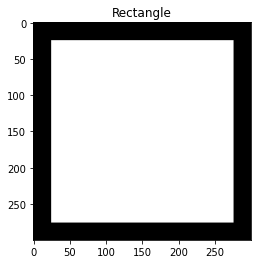

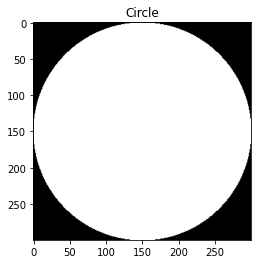

In [43]:
# draw a rectangle
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
plt_imshow("Rectangle", rectangle)

# draw a circle
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
plt_imshow("Circle", circle)

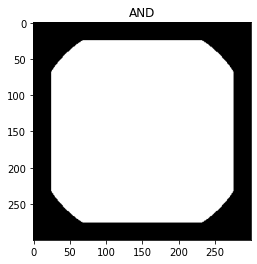

In [44]:
# a bitwise 'AND' is only 'True' when both inputs have a value that
# is "ON' -- in this case, the cv2.bitwise_and function examines
# every pixel in the rectangle and circle; if *BOTH* pixels have a
# value greater than zero then the pixel is turned 'ON (i.e., 255)
# in the output image; otherwise, the output value is set to
# 'OFF' (i.e., 0)
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
plt_imshow("AND", bitwiseAnd)

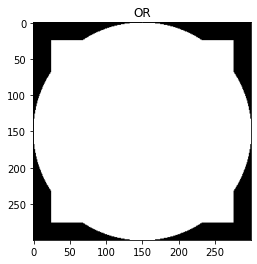

In [45]:
# a bitwise 'OR' examines every pixel in the two inputs, and if
# *EITHER* pixel in the rectangle or circle is greater than zero,
# then the output pixel has a value of 255, otherwise it is 0
bitwiseOr = cv2.bitwise_or(rectangle, circle)
plt_imshow("OR", bitwiseOr)

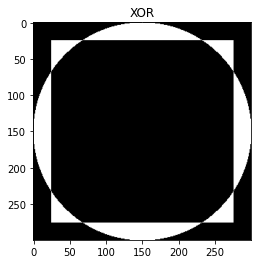

In [46]:
# the bitwise 'XOR' is identical to the 'OR' function, with one
# exception: both the rectangle and circle are not allowed to *BOTH*
# have values greater than 0 (only one can be 0)
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
plt_imshow("XOR", bitwiseXor)

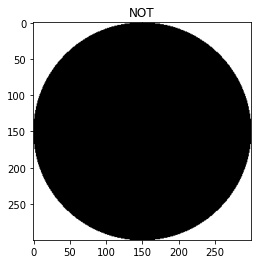

In [47]:
# finally, the bitwise 'NOT' inverts the values of the pixels; pixels
# with a value of 255 become 0, and pixels with a value of 0 become
# 255
bitwiseNot = cv2.bitwise_not(circle)
plt_imshow("NOT", bitwiseNot)

##  11 -  Masking


[Reference](https://pyimagesearch.com/2021/01/19/image-masking-with-opencv/?_ga=2.148374576.608670271.1656952021-258974203.1656952021)

- A mask allows us to focus only on the portions of the image that interests us.
- An application can be alpha blending transparency, highlighting the detected area by masking.

In [48]:
args = {
    "image": "neeraj.jpg"
}

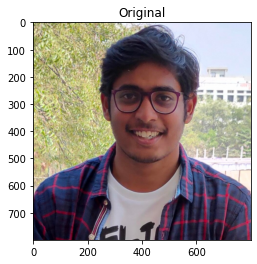

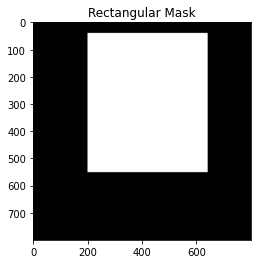

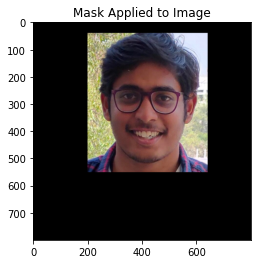

In [49]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (200, 40), (640, 550), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

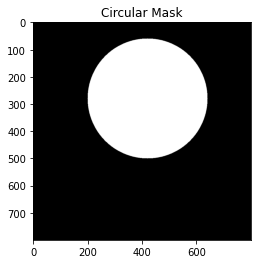

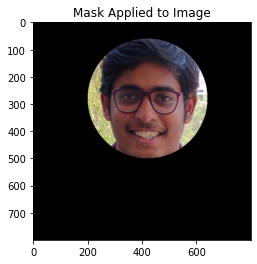

In [50]:
# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (420, 280), 220, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

##  12 -  Splitting and Merging Channels


[Reference](https://pyimagesearch.com/2021/01/23/splitting-and-merging-channels-with-opencv/?_ga=2.139330484.608670271.1656952021-258974203.1656952021)

In [51]:
args = {
    "image": "opencv_logo.png"
}

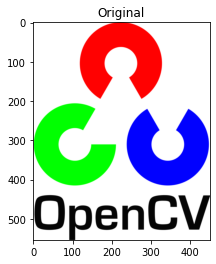

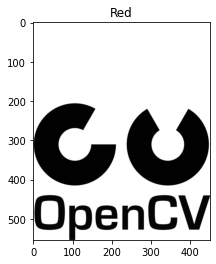

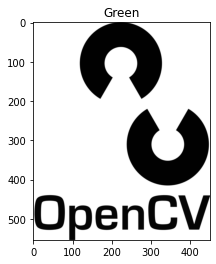

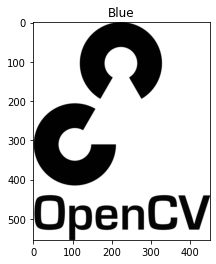

In [52]:
# load the input image and grab each channel -- note how OpenCV
# represents images as NumPy arrays with channels in Blue, Green,
# Red ordering rather than Red, Green Blue
image = cv2.imread(args["image"])
plt_imshow("Original", image)
(B, G, R) = cv2.split(image)

# show each channel individually
plt_imshow("Red", R)
plt_imshow("Green", G)
plt_imshow("Blue", B)

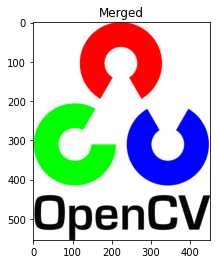

In [53]:
merged = cv2.merge([B, G, R])
plt_imshow("Merged", merged)

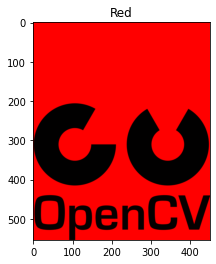

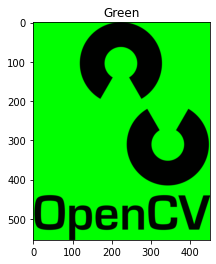

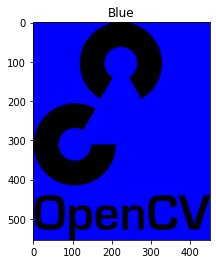

In [54]:
# visualize each channel in color
zeros = np.zeros(image.shape[:2], dtype="uint8")
plt_imshow("Red", cv2.merge([zeros, zeros, R]))
plt_imshow("Green", cv2.merge([zeros, G, zeros]))
plt_imshow("Blue", cv2.merge([B, zeros, zeros]))